# Actividad 4


## Instituto Tecnológico de Monterrey
## Ciencia y analítica de datos

###Alumnos
###
###

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Parte 1 del Análisis 


Paso 1 - Obteniendo la información

In [107]:
# Tomando datos de la ruta local, llamando la fuente de datos ccc.cvs tomada del fuente Credit Card Clients
CreditCardData = 'ccc.csv'

In [108]:
# Datos originales
originalDF = pd.read_csv( CreditCardData )

# Declarando el dataset de trabajo
cccDF = originalDF.copy()

# Cambiamos los headers
cccDF.columns = ['ID', 'Given Credit', 'Gender', 'Education', 'Marital status', 'Age', 
                'sep05', 'ago05', 'jul05','jun05', 'may05', 'abr05', 
                'sep05A', 'ago05A', 'jul05A', 'jun05A', 'may05A', 'abr05A', 
                'sep05PP', 'ago05PP', 'jul05PP', 'jun05PP', 'may05PP', 'abr05PP', 'Y']



In [109]:
# Hay que determinar los tipos de datos
cccDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   Given Credit    30000 non-null  int64  
 2   Gender          29999 non-null  float64
 3   Education       29998 non-null  float64
 4   Marital status  29998 non-null  float64
 5   Age             29995 non-null  float64
 6   sep05           29997 non-null  float64
 7   ago05           29995 non-null  float64
 8   jul05           29993 non-null  float64
 9   jun05           29991 non-null  float64
 10  may05           29984 non-null  float64
 11  abr05           29986 non-null  float64
 12  sep05A          29989 non-null  float64
 13  ago05A          29989 non-null  float64
 14  jul05A          29987 non-null  float64
 15  jun05A          29985 non-null  float64
 16  may05A          29983 non-null  float64
 17  abr05A          29990 non-null 

Paso 2 - Limpiando la información

In [110]:

# Removemos las variables categoricas para dejar puras variables numéricas que aporten a PCA
cccDF.drop(columns = ['Gender', 'Education', 'Marital status', 'Y' ], inplace=True)

# Optamos por eliminar los datos vacíos 
cccDF.dropna( axis=0, inplace=True)

cccDF.head(10)

,ID,Given Credit,Age,sep05,ago05,jul05,jun05,may05,abr05,sep05A,...,jul05A,jun05A,may05A,abr05A,sep05PP,ago05PP,jul05PP,jun05PP,may05PP,abr05PP
0,1,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,6,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,7,500000,29.0,0.0,0.0,0.0,0.0,0.0,0.0,367965.0,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
7,8,100000,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.0,...,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
8,9,140000,28.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,...,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
9,10,20000,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,...,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0


In [111]:
# Comprobamos que ya no existen nulos
cccDF.isnull().any()

ID              False
Given Credit    False
Age             False
sep05           False
ago05           False
jul05           False
jun05           False
may05           False
abr05           False
sep05A          False
ago05A          False
jul05A          False
jun05A          False
may05A          False
abr05A          False
sep05PP         False
ago05PP         False
jul05PP         False
jun05PP         False
may05PP         False
abr05PP         False
dtype: bool

In [112]:
# Como un primer análisis establecemos la correlación entre variables

corrVar = cccDF.corr()
corrVar

,ID,Given Credit,Age,sep05,ago05,jul05,jun05,may05,abr05,sep05A,...,jul05A,jun05A,may05A,abr05A,sep05PP,ago05PP,jul05PP,jun05PP,may05PP,abr05PP
ID,1.000000,0.026230,0.019104,-0.030036,-0.010967,-0.018695,-0.003163,-0.022442,-0.020636,0.019360,...,0.024372,0.040379,0.016807,0.016773,0.009673,0.008374,0.039068,0.007752,0.000616,0.002889
Given Credit,0.026230,1.000000,0.144515,-0.271201,-0.296206,-0.286245,-0.267371,-0.249340,-0.235183,0.285616,...,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Age,0.019104,0.144515,1.000000,-0.039432,-0.050154,-0.053249,-0.049865,-0.054006,-0.048821,0.056357,...,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
sep05,-0.030036,-0.271201,-0.039432,1.000000,0.672290,0.574706,0.539384,0.509783,0.474809,0.187115,...,0.179796,0.179138,0.180651,0.176992,-0.079230,-0.070083,-0.070460,-0.063934,-0.058104,-0.058616
ago05,-0.010967,-0.296206,-0.050154,0.672290,1.000000,0.766857,0.662429,0.622990,0.575434,0.234878,...,0.224105,0.222216,0.221287,0.219339,-0.080771,-0.058981,-0.055864,-0.046856,-0.037049,-0.036491
jul05,-0.018695,-0.286245,-0.053249,0.574706,0.766857,1.000000,0.777245,0.686447,0.632396,0.208843,...,0.227827,0.227518,0.225453,0.222608,0.001210,-0.066784,-0.053294,-0.046001,-0.035813,-0.035816
jun05,-0.003163,-0.267371,-0.049865,0.539384,0.662429,0.777245,1.000000,0.819655,0.716278,0.203124,...,0.245260,0.246180,0.243161,0.239379,-0.009475,-0.001893,-0.069260,-0.043421,-0.033630,-0.026537
may05,-0.022442,-0.249340,-0.054006,0.509783,0.622990,0.686447,0.819655,1.000000,0.816660,0.206904,...,0.243496,0.272062,0.269916,0.262614,-0.006199,-0.003139,0.009061,-0.058267,-0.033325,-0.022982
abr05,-0.020636,-0.235183,-0.048821,0.474809,0.575434,0.632396,0.716278,0.816660,1.000000,0.207449,...,0.241210,0.266387,0.290901,0.285095,-0.001603,-0.005191,0.005801,0.019109,-0.046474,-0.025285
sep05A,0.019360,0.285616,0.056357,0.187115,0.234878,0.208843,0.203124,0.206904,0.207449,1.000000,...,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287


<AxesSubplot: >

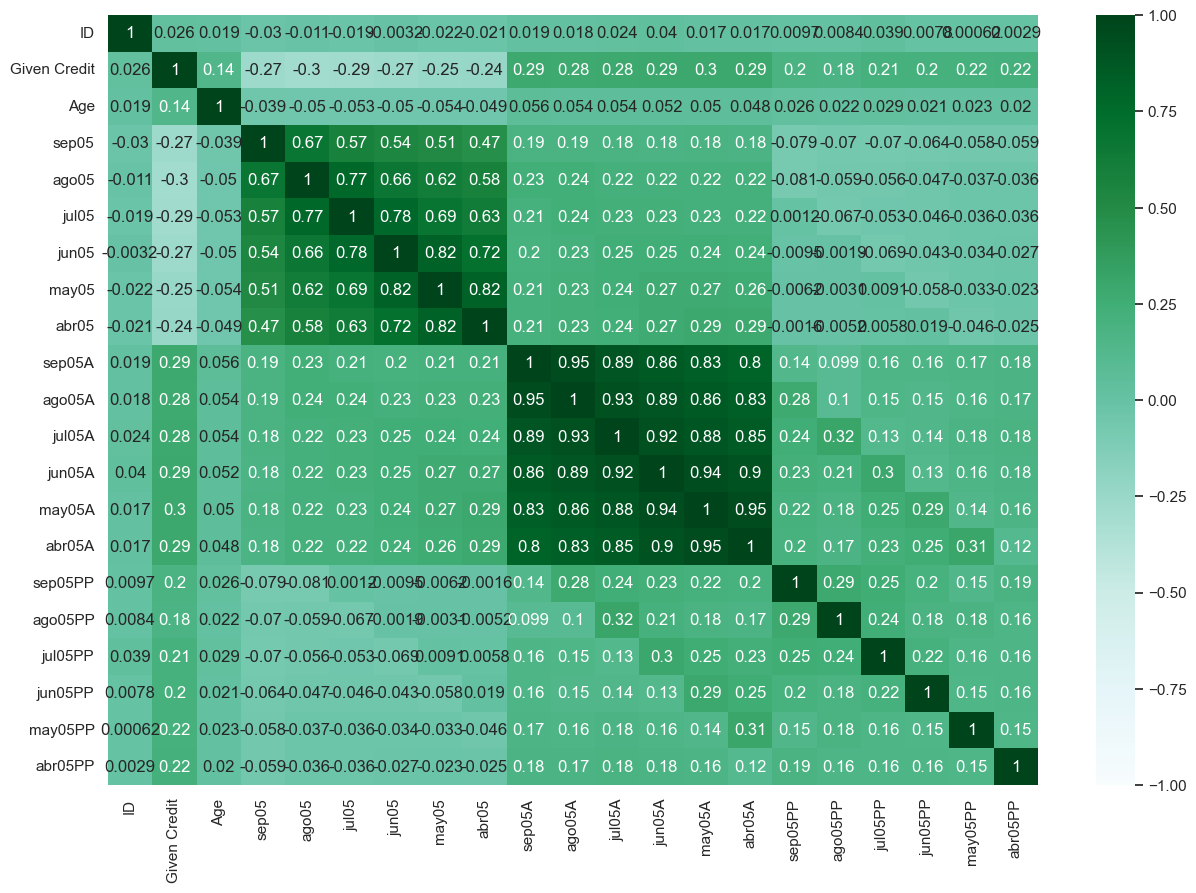

In [113]:
# Imprimiendo la correlación en un mapa de calor

sns.set( rc= {'figure.figsize':(15, 10)})
sns.heatmap( corrVar, vmin = -1, vmax = 1, cmap = "BuGn", annot = True)

Paso 3 - Aplicamos PCA

In [114]:
# Generamos otra copia del DF
pcaDF = cccDF.copy()

# Creamos un objeto de PCA
modeloPCA = PCA()

# Hacemos el fit del DataFrame
modeloPCA.fit( pcaDF )


resultadoDFPCA = pd.DataFrame({'Desviación estándar: ': np.sqrt(modeloPCA.explained_variance_),
                                'Proporción de la varianza: ': modeloPCA.explained_variance_ratio_,
                                'Proportion acumulativa: ': np.cumsum(modeloPCA.explained_variance_ratio_)
                             })
resultadoDFPCA = resultadoDFPCA.transpose()
resultadoDFPCA.columns = ['PCX_{}'.format(i) for i in range(1, len(resultadoDFPCA.columns) + 1)]
resultadoDFPCA.round(4) 

,PCX_1,PCX_2,PCX_3,PCX_4,PCX_5,PCX_6,PCX_7,PCX_8,PCX_9,PCX_10,...,PCX_12,PCX_13,PCX_14,PCX_15,PCX_16,PCX_17,PCX_18,PCX_19,PCX_20,PCX_21
Desviación estándar:,166585.2715,115824.7337,37256.8883,27747.4258,20699.8015,20282.2199,18521.7616,17042.3560,16294.1512,11624.1352,...,8794.8568,8687.6900,8108.0909,9.113,2.0619,0.9386,0.7319,0.5963,0.5119,0.4183
Proporción de la varianza:,0.6096,0.2947,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,...,0.0017,0.0017,0.0014,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Proportion acumulativa:,0.6096,0.9042,0.9347,0.9517,0.9611,0.9701,0.9776,0.9840,0.9898,0.9928,...,0.9969,0.9986,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


90.0


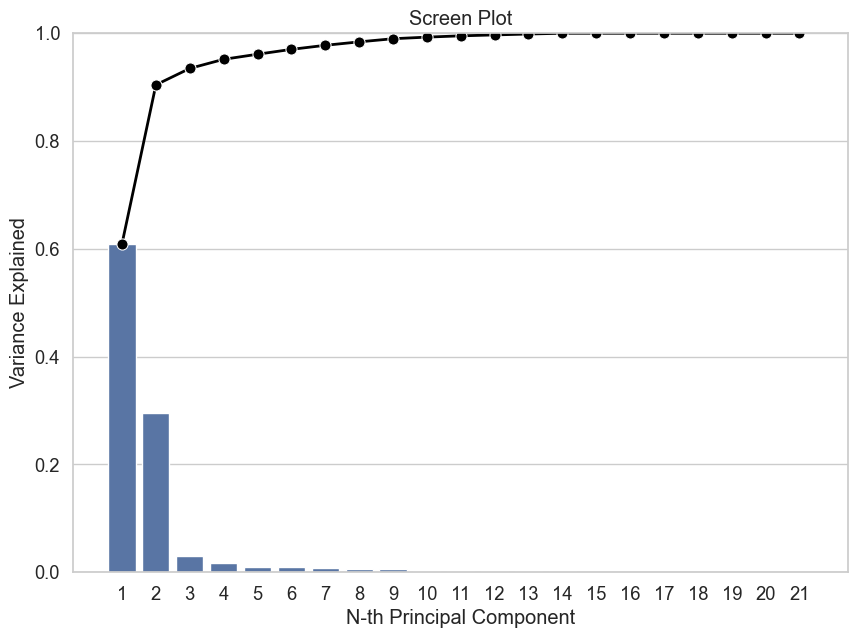

In [126]:
# Ahora graficamos la desviación estándar para analizar gráficamente

PC_components = np.arange(modeloPCA.n_components_) + 1


_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = modeloPCA.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(modeloPCA.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Screen Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

De la gráfica resultante se puede observar que las dos primeras variables son las que tienen la mayor asociación con el resto de las variables por lo que éstas pueden elegirse para continuar el análisis.

Las variables resultantes son:
- X1 - Given credit
- X5 - Age

In [116]:
# Obtenemos una copia del Dataframe pero solo con las columnas del análisis
newDF = cccDF.iloc[:,1:3]

# Revisamos contenido
newDF.head()

,Given Credit,Age
0,20000,24.0
1,120000,26.0
2,90000,34.0
3,50000,37.0
4,50000,57.0


In [117]:
# Normalizar los datos a la misma escala, ya que una varible es Edad la otra es Monto y de manera natural son distantes

normalDF = pd.DataFrame(preprocessing.scale(newDF))
normalDF.columns= ["X1","X5"]
normalDF

,X1,X5
0,-1.137363,-1.246282
1,-0.366561,-1.029224
2,-0.597802,-0.160996
3,-0.906122,0.164590
4,-0.906122,2.335161
...,...,...
29953,0.404240,0.381647
29954,-0.135321,0.815761
29955,-1.060283,0.164590
29956,-0.674882,0.598704


In [118]:
# Ahora se calcula la varianza

Variance = np.cov([normalDF.X1, normalDF.X5])
print("Arreglo de Varianza: \n" + str(Variance))

t= normalDF.var().sum() #Cálculo total de Varianza
varX1 =Variance[0][0] #Varianza Total de X1
varX5 = Variance[1][1] #Varianza Total de X5

print("\n")
print('Total Varience \t\t:', t.round(2) )
print('Varience prop. of X1 \t:', ((varX1/t)*100).round(2),'%' )
print('Varience prop. of X5 \t:', ((varX5/t)*100).round(2),'%' )

Arreglo de Varianza: 
[[1.00003338 0.14451983]
 [0.14451983 1.00003338]]


Total Varience 		: 2.0
Varience prop. of X1 	: 50.0 %
Varience prop. of X5 	: 50.0 %


<AxesSubplot: xlabel='X1', ylabel='X5'>

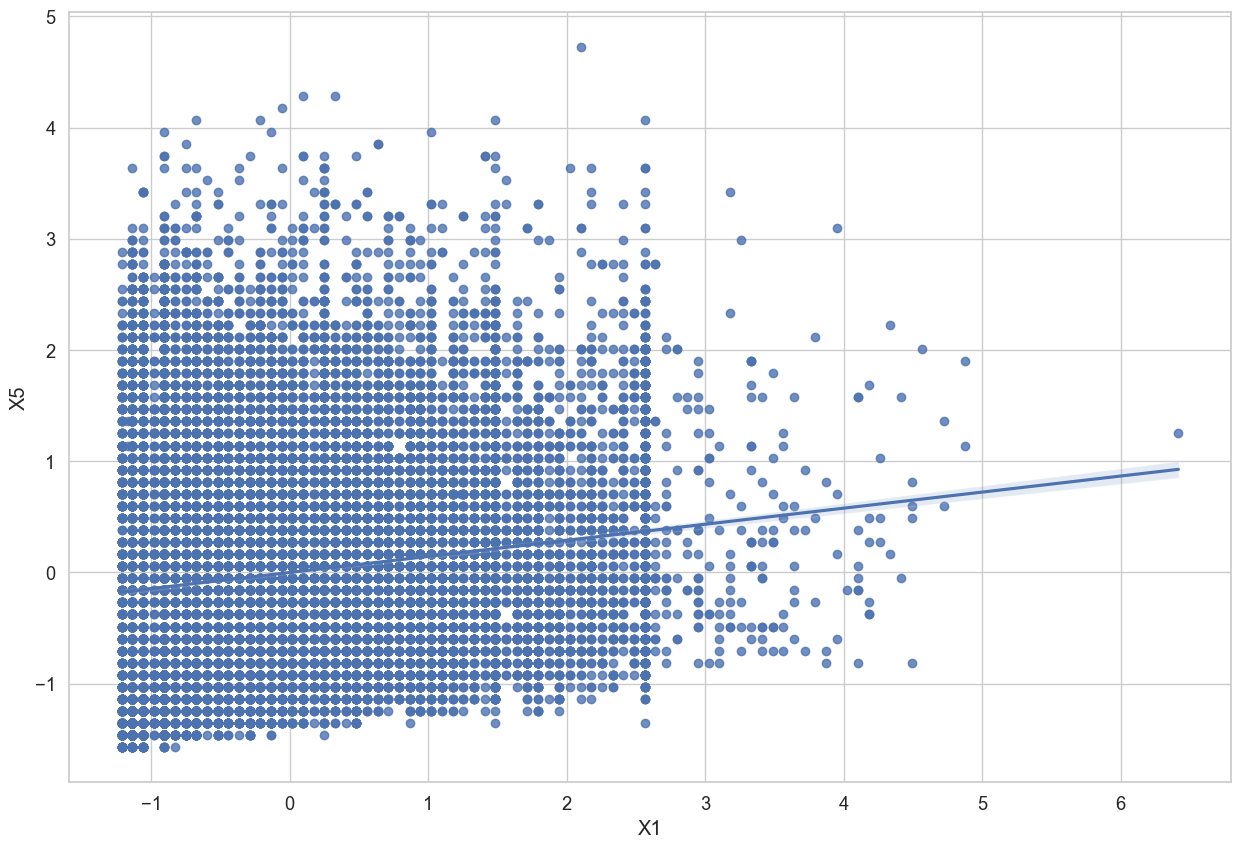

In [119]:
# Generamos la gráfica normalizada

p = sns.regplot(data = originalDF,  
                x = normalDF.X1, 
                y = normalDF.X5
               ) 
p

In [120]:
# Generando un nuevo resumen sobre los datos normalizados

pcs = PCA(n_components=2)

pcs.fit(normalDF[['X1', 'X5']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ["X1", "X5"]
pcsSummary

,X1,X5
Standard deviation,1.069838,0.924940
Proportion of variance,0.572258,0.427742
Cumulative proportion,0.572258,1.000000


Paso 4 - Identificar datos atípicos

50000      3356
20000      1969
30000      1607
80000      1565
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: Given Credit, Length: 81, dtype: int64


No. de Montos Diferentes: 81

Montos Menos pedidos    : 
1000000    1
327680     1
760000     1
690000     1
740000     2
Name: Given Credit, dtype: int64

No. de Más pedidos      : 
50000     3356
20000     1969
30000     1607
80000     1565
200000    1528
Name: Given Credit, dtype: int64

Descripción del set     : 
count      81.000000
mean      369.851852
std       548.515795
min         1.000000
25%         8.000000
50%       161.000000
75%       587.000000
max      3356.000000
Name: Given Credit, dtype: float64





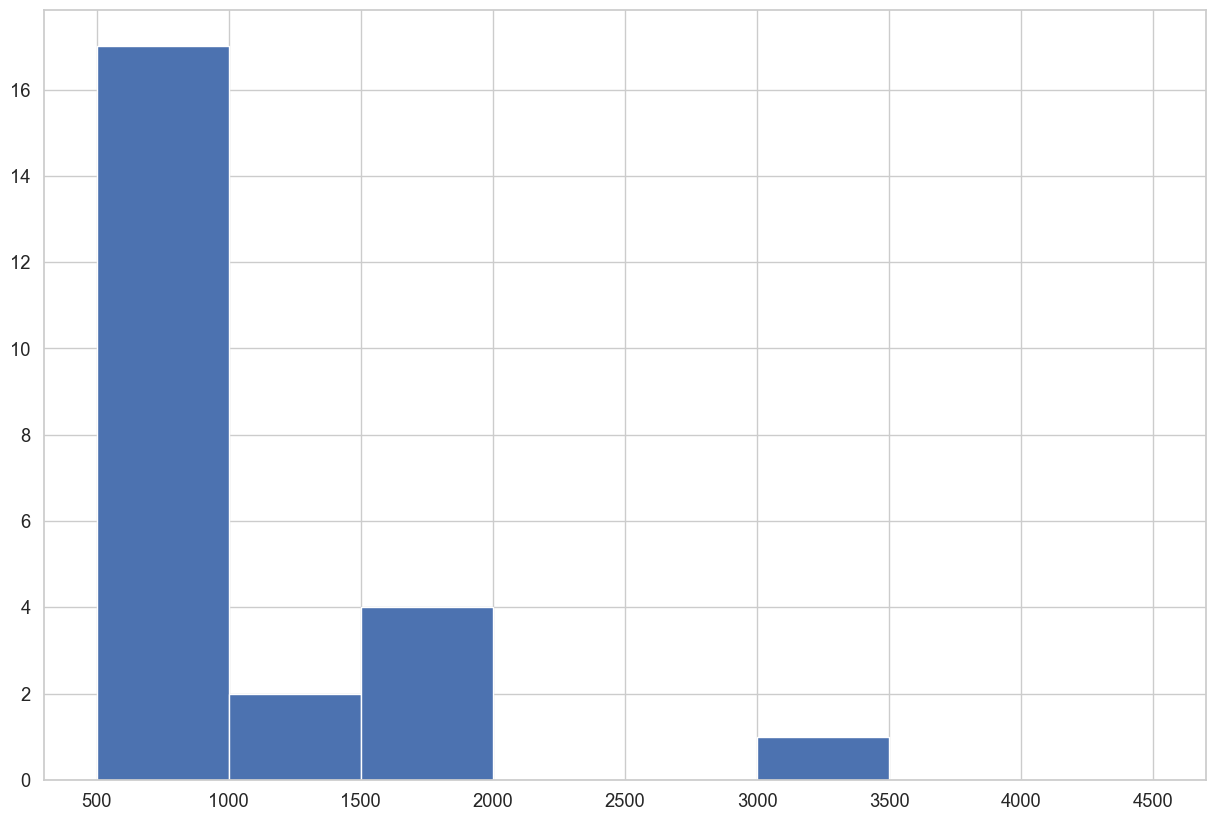

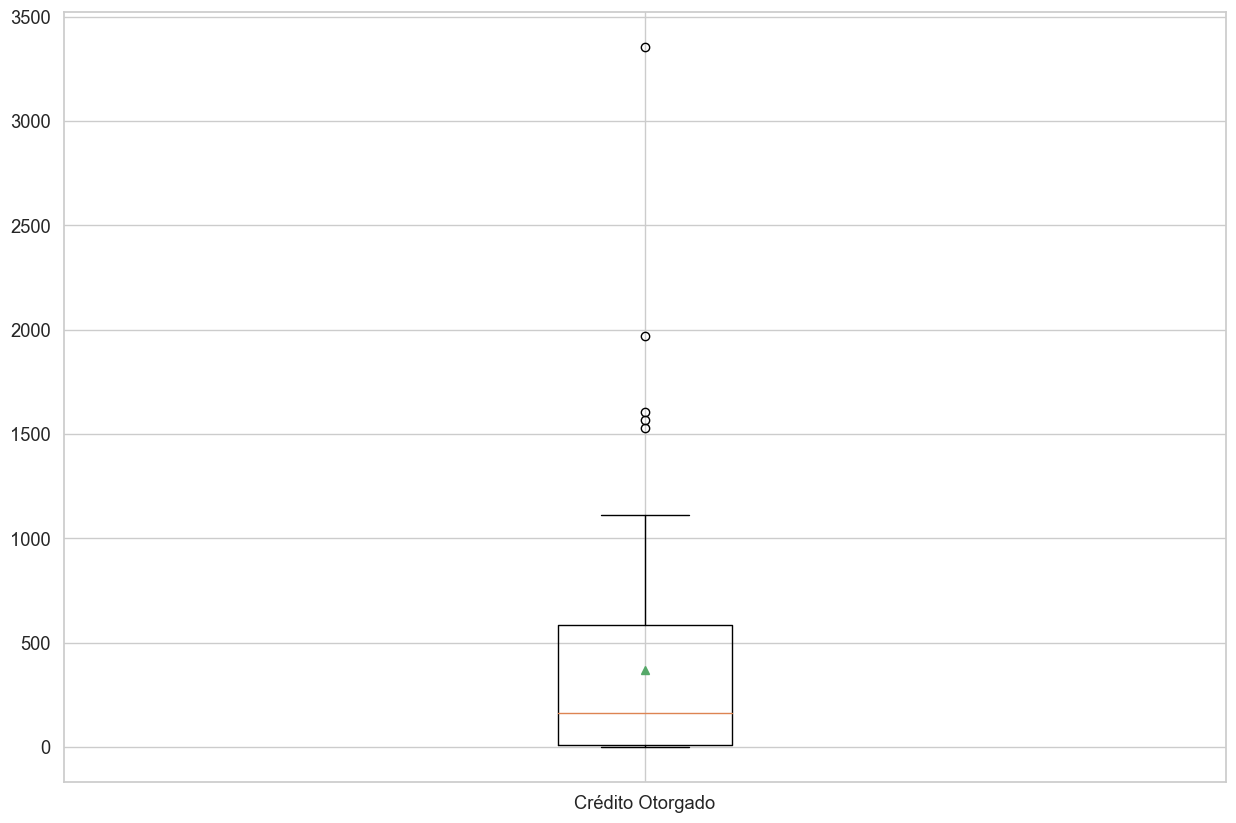

In [121]:
# Se analiza primero la variable X1 - Crédito Otorgado

valorAtipico = cccDF.copy()

# Obtenemos un nuevo dataframe con la información de X1
x1DF = valorAtipico["Given Credit"].value_counts()


print(str(x1DF))
print("\n")
print("No. de Montos Diferentes: " + str(len(x1DF))+"\n")
print("Montos Menos pedidos    : \n" + str(x1DF.nsmallest(5))+"\n")
print("No. de Más pedidos      : \n" + str(x1DF.nlargest(5))+"\n")
print("Descripción del set     : \n" + str(x1DF.describe())+"\n")
print("\n")


#Se crean las gráficas
credit_bins=[500,1000,1500,2000,2500,3000,3500,4000,4500]
plt.hist(x1DF,bins=credit_bins)
plt.show()

print("\n")
plt.boxplot(x1DF, labels = ["Crédito Otorgado"], showmeans= True)
plt.show()

29.0    1601
27.0    1475
28.0    1408
30.0    1393
26.0    1255
31.0    1216
25.0    1184
34.0    1161
32.0    1156
33.0    1145
Name: Age, dtype: int64


No. de Edades Distintas       : 56

Edades con menos aplicaciones : 
79.0    1
74.0    1
75.0    2
72.0    3
71.0    3
Name: Age, dtype: int64

Edades con más aplicaciones   : 
29.0    1601
27.0    1475
28.0    1408
30.0    1393
26.0    1255
Name: Age, dtype: int64

Descripción del set: 
 count      56.000000
mean      534.964286
std       502.923561
min         1.000000
25%        40.750000
50%       430.500000
75%       975.500000
max      1601.000000
Name: Age, dtype: float64





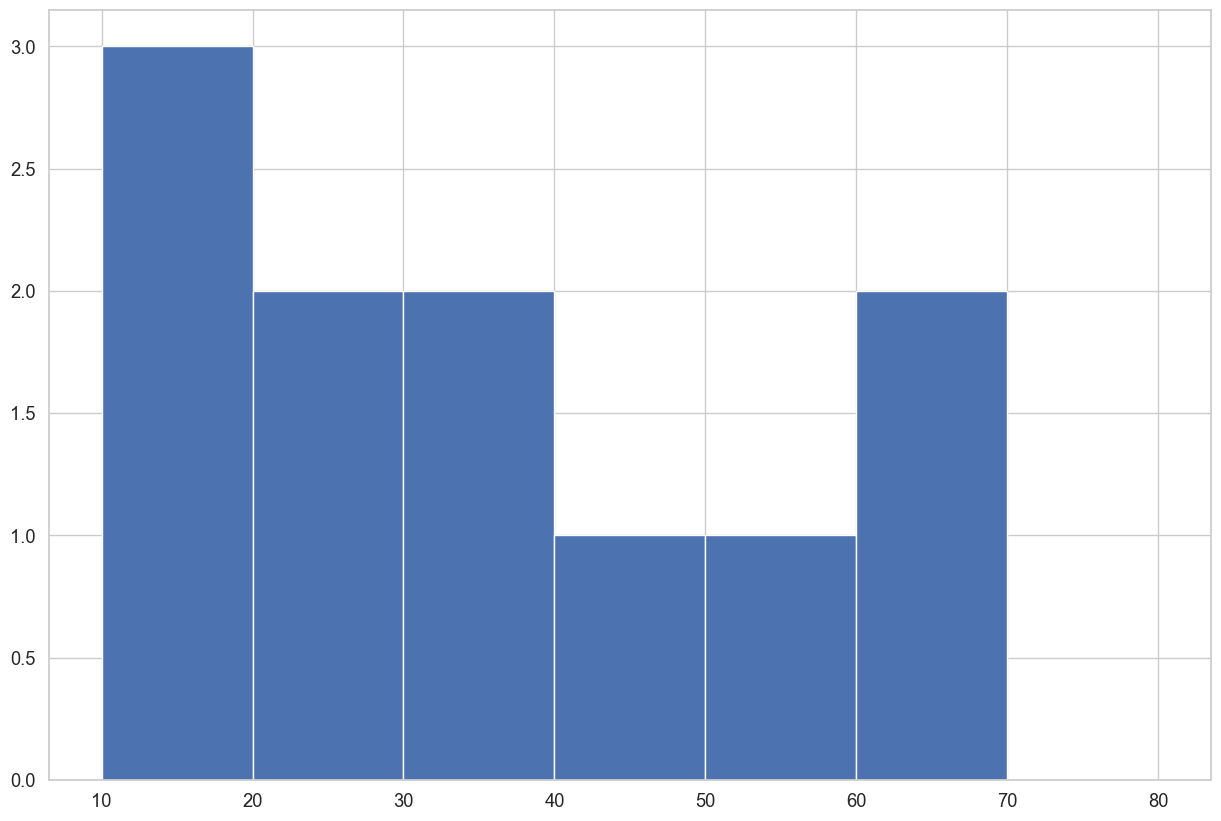

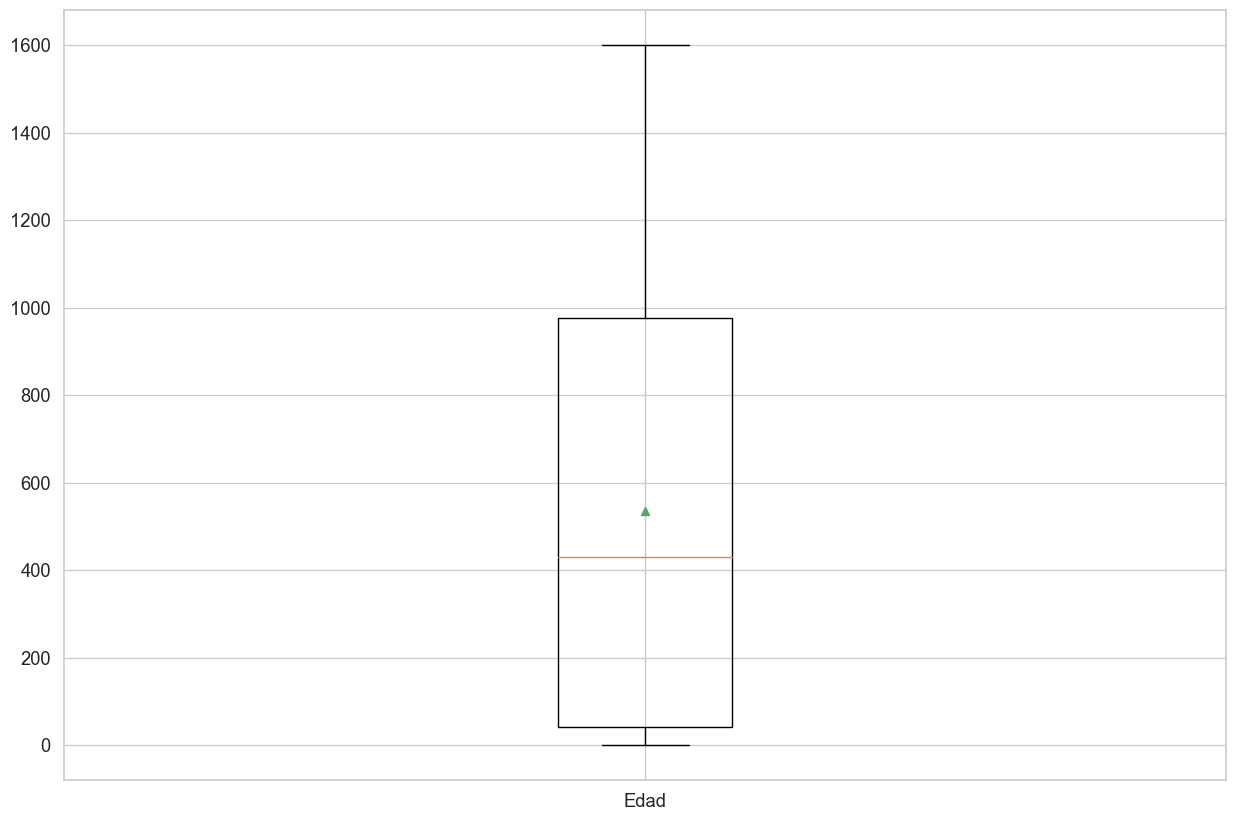

In [122]:
# Se analiza primero la variable X5 - Edad

# Obtenemos un nuevo dataframe con la información de X5, redondeando la edad para no tener decimales
x5DF = np.round(valorAtipico["Age"], decimals=0)
x5DF = x5DF.value_counts()
print( str(x5DF.head(10)) )

print("\n")
print("No. de Edades Distintas       : " + str(len(x5DF))+"\n")
print("Edades con menos aplicaciones : \n" + str(x5DF.nsmallest(5))+"\n")
print("Edades con más aplicaciones   : \n" + str(x5DF.nlargest(5))+"\n")
print("Descripción del set: \n " + str(x5DF.describe())+"\n")
print("\n")

#Se crean las gráficas
age_bins = [10,20,30,40,50,60,70,80]
plt.hist(x5DF, bins=age_bins)
plt.show()

print("\n")
plt.boxplot(x5DF, labels = ["Edad"], showmeans= True)
plt.show()